In [9]:
import os
import rasterio as rio
import shapely
import pandas
import geopandas as gpd

import matplotlib.pyplot as plt
# polygon = shapely.geometry.box(*gdf.total_bounds, ccw=True)

In [2]:
dirname = '/Users/mikhailgasanov/Library/CloudStorage/GoogleDrive-appliedco2@gmail.com/Мой диск/SATELLITE_DATE SAKHALIN_2022'

In [10]:
list(bbox)

[466740.0, 4912490.0, 564020.0, 5009770.0]

In [42]:
gdf = None
polygons = {'fnames': [],
           'polygons': [],
           'crs':[]}
for file in os.listdir(dirname):
    fname = os.path.join(dirname, file)
    with rio.open(fname, 'r+') as src:
        meta = src.meta
        bbox = src.bounds
        positions = {'left': src.bounds.left, # 98.01
        'bottom':src.bounds.bottom,
        'right': src.bounds.right,
        'top': src.bounds.top}
        poly = shapely.geometry.box(*bbox,
                                    ccw=True)
    gdf_seris = gpd.GeoDataFrame(data=[file], geometry=[poly], crs=src.crs)
    gdf_seris = gdf_seris.to_crs(epsg=3857)
    polygons['fnames'].append(fname)
    polygons['crs'].append(src.crs.to_epsg())
    polygons['polygons'].append(gdf_seris.geometry.values[0])
#     if gdf is None:
#         gdf = gdf_seris
#     else:
#         gdf.loc[len(gdf)] = gdf_seris 
#     break 

In [45]:
gdf = gpd.GeoDataFrame(data=polygons['fnames'], 
                 geometry=polygons['polygons'],
                 crs='EPSG:8357')

In [48]:
gdf['crs'] = polygons['crs']
gdf = gdf.rename(columns={0:'fname'})

InvalidLatitudeError: Y can not be computed: lat=90.00000000001

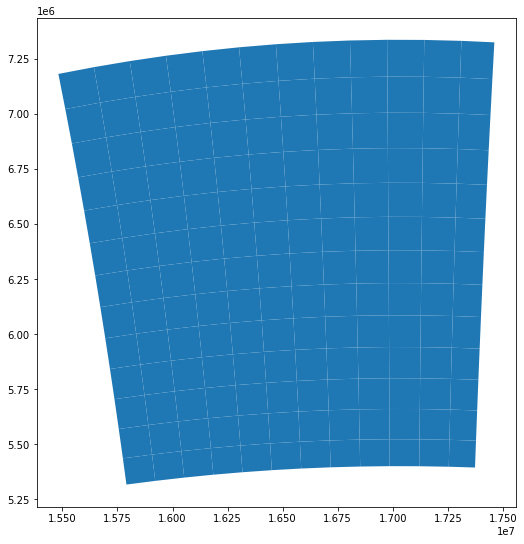

In [29]:
# gdf.plot()
import contextily as cx
ax = gdf.plot(figsize=(9, 9))
cx.add_basemap(ax, crs=gdf.crs.to_string(), zoom=4)

In [32]:
tgt = '/Users/mikhailgasanov/Library/CloudStorage/GoogleDrive-appliedco2@gmail.com/Мой диск/SATELLITE_DATE SAKHALIN_2022/sakhalin_2022-0000038912-0000009728.tif'

with rio.open(tgt, 'r+') as src:
    x = src.read()

In [36]:
gdf = gdf.rename(columns={0:'fname'})

In [49]:
gdf.to_file('/Users/mikhailgasanov/Downloads/extent.geojson')

In [51]:
gdf['crs'].unique()

array([32656])

## Merge bands, terrains and texture

In [4]:
filenames = ["contrast1.tiff",
"contrast2.tiff",
"dissimilarity1.tiff",
"dissimilarity2.tiff",
"homogeneity1.tiff",
"homogeneity2.tiff",
"ASM1.tiff",
"ASM2.tiff",
"energy1.tiff",
"energy2.tiff",
"correlation1.tiff",
"correlation2.tiff"]

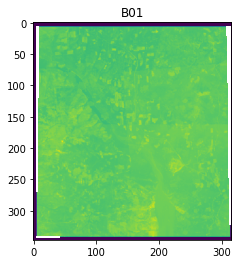

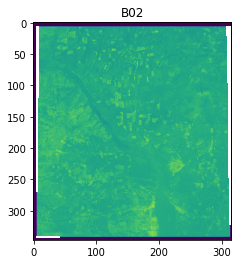

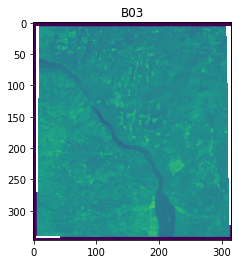

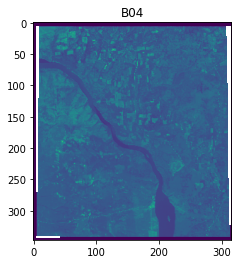

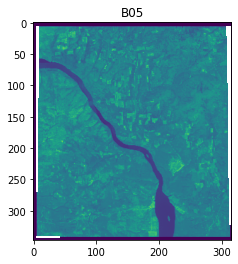

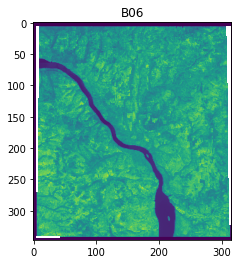

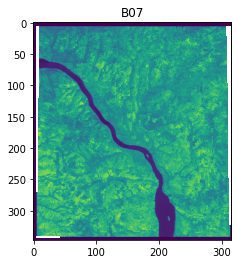

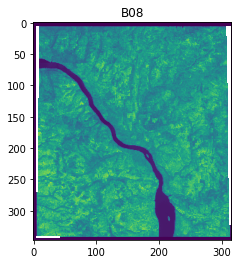

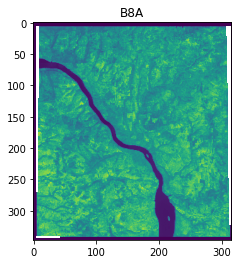

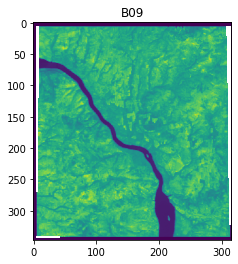

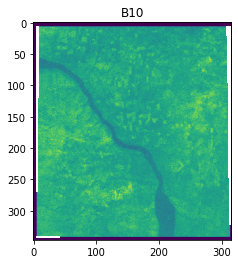

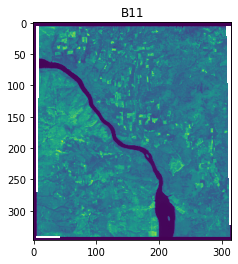

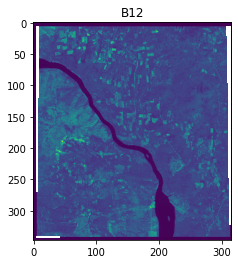

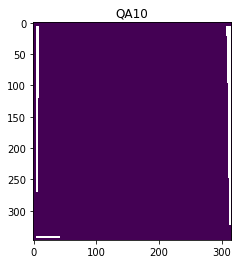

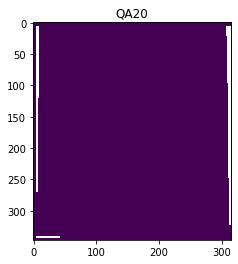

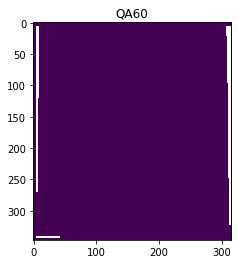

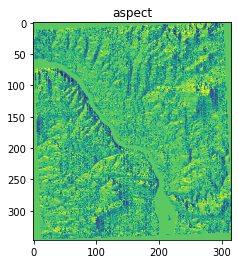

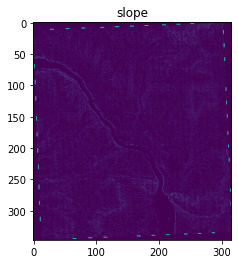

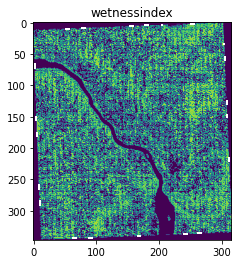

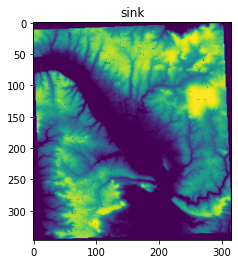

In [18]:
folder = '../rasters/'
source_fname = '../rasters/bands_and_terrain.tiff'

bands = ["B01",
            "B02",
            "B03",
            "B04",
            "B05",
            "B06",
            "B07",
            "B08",
            "B8A",
            "B09",
            "B10",
            "B11",
            "B12",
            "QA10",
            "QA20",
            "QA60",
            "aspect", 
            "slope",
            "wetnessindex", 
             "sink"]

with rio.open(source_fname, 'r') as src:
    for i, band in enumerate(bands):
        band_values = src.read(i+1)
        plt.imshow(band_values[::10, ::10])
        plt.title(band)
        plt.show()
#         break
        
        

In [13]:
band_values.shape

(3461, 3159)

In [8]:
bands = ["B01",
            "B02",
            "B03",
            "B04",
            "B05",
            "B06",
            "B07",
            "B08",
            "B8A",
            "B09",
            "B11",
            "B12"]
len(bands)

12

In [7]:
folder = '../rasters/'
# source_fname = os.path.
for file in filenames:
    with rio.open(os.path.join(folder, file), 'r') as src:
        print(file,src.shape, src.crs.to_epsg())

contrast1.tiff (3461, 3159) 32647
contrast2.tiff (3461, 3159) 32647
dissimilarity1.tiff (3461, 3159) 32647
dissimilarity2.tiff (3461, 3159) 32647
homogeneity1.tiff (3461, 3159) 32647
homogeneity2.tiff (3461, 3159) 32647
ASM1.tiff (3461, 3159) 32647
ASM2.tiff (3461, 3159) 32647
energy1.tiff (3461, 3159) 32647
energy2.tiff (3461, 3159) 32647
correlation1.tiff (3461, 3159) 32647
correlation2.tiff (3461, 3159) 32647
